In [3]:
import pandas as pd 
import numpy as np 
import json


import matplotlib
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['lines.linewidth'] = 1.0
matplotlib.rcParams['lines.dashed_pattern'] = [6, 6]
matplotlib.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
matplotlib.rcParams['lines.dotted_pattern'] = [1, 3]
matplotlib.rcParams['lines.scale_dashes'] = False


import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.markers as mmark
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from matplotlib.lines import Line2D



SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE-1)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', markersize=2)
#plt.grid(True)

# For ADULT Dataset

In [4]:
res = '../results/results-adult.json'

with open(res, 'r') as f:
    res_dict = json.load(f)
print (len(res_dict.keys()))
res_dict

res_records = []
for key in res_dict.keys():
    key_dict = json.loads(key)
    val_dict = res_dict[key]
    final_dict = {**key_dict, **val_dict}
    res_records.append(final_dict)

df_res = pd.DataFrame.from_records(res_records).round(4)
df_res[df_res['random_seed']==4]

205


,strategy,random_seed,model_size,iteration,Advantage,Preference,Symmetric Difference,AUC
4,original,4,small,0,"{'White Male,Black Male': -1.4432899320127035e...","{'White Male,Black Male': -0.06608261307041452...",0.0956,0.8370
9,race-permute,4,small,0,"{'White Male,Black Male': 0.005073035299341555...","{'White Male,Black Male': -0.03160274137525676...",0.0407,0.8345
50,Rmv-SymDiff,4,small,0,"{'White Male,Black Male': -1.5543122344752192e...","{'White Male,Black Male': -0.0660826130704143,...",0.0956,0.8370
51,Rmv-SymDiff,4,small,1,"{'White Male,Black Male': 0.0, 'Black Male,Whi...","{'White Male,Black Male': -0.09026792817319973...",0.0526,0.8369
52,Rmv-SymDiff,4,small,2,"{'White Male,Black Male': 2.220446049250313e-1...","{'White Male,Black Male': -0.10603478577105341...",0.0495,0.8352
53,Rmv-SymDiff,4,small,3,"{'White Male,Black Male': 8.175282583589016e-0...","{'White Male,Black Male': -0.0767024864950343,...",0.0632,0.8364
54,Rmv-SymDiff,4,small,4,"{'White Male,Black Male': 0.002927316359600307...","{'White Male,Black Male': -0.11801605110453317...",0.1019,0.8373
55,Rmv-SymDiff,4,small,5,"{'White Male,Black Male': -5.551115123125783e-...","{'White Male,Black Male': -0.12558297292611942...",0.0986,0.8324
56,Rmv-SymDiff,4,small,6,"{'White Male,Black Male': 0.000304539653648627...","{'White Male,Black Male': -0.13518960189990992...",0.1133,0.8357
57,Rmv-SymDiff,4,small,7,"{'White Male,Black Male': 0.000667159856721166...","{'White Male,Black Male': -0.1084846261753869,...",0.0732,0.8367


In [5]:
raw_strategy = ['original', 'race-permute', 'Rmv-SymDiff','Aug-SymDiff']
strategy_label = ['Original', 'Race-Permuted', 'Data-Removed(Best Fairness)','Data-Augmented(Best Fairness)']
records_list = []


def return_printable_df(random_seed, model_size):
    auc_dict = {}
    sd_dict ={}
    df_data =  df_res[df_res['random_seed']==random_seed] 
    for df_strategy, strategy_lb  in zip(raw_strategy, strategy_label):
        # print(df_data)
        # return None
        _df = df_data[(df_data['strategy'] == df_strategy) & (df_data['model_size'] == model_size)  & (df_data['AUC']>0.501)] 
        sd_list = _df['Symmetric Difference'].tolist()
        auc_list = _df['AUC'].tolist()
        if strategy_lb == 'Original':
            print (random_seed)
            print (_df)
            sd = sd_list[0]
            auc = auc_list[0]
        if strategy_lb == 'Race-Permuted':
            if _df.shape[0] == 0:
                sd = np.NaN
                auc = np.NaN
            else:
                sd = sd_list[0]
                auc = auc_list[0]
        if strategy_lb == 'Data-Removed(Best Fairness)':
            # the best fairness score
            best_fairness_iter= np.argmin(sd_list)
            sd = (sd_list[best_fairness_iter], best_fairness_iter)
            auc = (auc_list[best_fairness_iter], best_fairness_iter)
            
            # best_auc_iter= np.argmax(auc_list)
            # sd.append((sd_list[best_auc_iter], best_auc_iter))
            # auc.append((auc_list[best_auc_iter], best_auc_iter))

        if strategy_lb == 'Data-Augmented(Best Fairness)':
            best_fairness_iter= np.argmin(sd_list)
            sd = (sd_list[best_fairness_iter], best_fairness_iter)
            auc = (auc_list[best_fairness_iter], best_fairness_iter)
            # best_auc_iter= np.argmax(auc_list)
            # sd.append((sd_list[best_auc_iter], best_auc_iter))
            # auc.append((auc_list[best_auc_iter], best_auc_iter))
        
        auc_dict[strategy_lb] = auc
        sd_dict[strategy_lb] = sd
        # print (strategy_lb, _df.shape, sd, auc)



    sd_dict.update({'model_size':model_size, 'random_seed':random_seed, 'measure':'Sym. Diff.'})
    auc_dict.update({'model_size':model_size, 'random_seed':random_seed, 'measure':'AUC'})

    # for strategy_lb in auc_dict.keys():
    #     records_list.append({'model_size':model_size, 'random_seed':random_seed, 'measure':'Sym. Diff.', strategy_lb: sd_dict[strategy_lb]})
    #     records_list.append({'model_size':model_size, 'random_seed':random_seed, 'measure':'AUC', strategy_lb: auc_dict[strategy_lb]})
    print_df = pd.DataFrame.from_records([auc_dict, sd_dict])[['model_size', 'random_seed', 'measure', 'Original', 'Race-Permuted',  'Data-Removed(Best Fairness)', 'Data-Augmented(Best Fairness)']]
    return print_df

random_seed = 1
model_size = 'small'

df_list = []
for model_size in ['small', 'medium']:
    for random_seed in [0,1,2,3]:
        df_list.append(return_printable_df(random_seed, model_size))

all_pd = pd.concat(df_list).reset_index(drop = True)
all_pd = all_pd.set_index(['model_size','random_seed','measure'])

# print_df.set_index(['model_size', 'random_seed'])

0
   strategy  random_seed model_size  iteration  \
0  original            0      small          0   

                                           Advantage  \
0  {'White Male,Black Male': -4.66273797350425e-1...   

                                          Preference  Symmetric Difference  \
0  {'White Male,Black Male': -0.06350326494810221...                0.0364   

      AUC  
0  0.8373  
1
   strategy  random_seed model_size  iteration  \
1  original            1      small          0   

                                           Advantage  \
1  {'White Male,Black Male': -3.3306690738754696e...   

                                          Preference  Symmetric Difference  \
1  {'White Male,Black Male': -0.13636126994021713...                0.0339   

      AUC  
1  0.8319  
2
   strategy  random_seed model_size  iteration  \
2  original            2      small          0   

                                           Advantage  \
2  {'White Male,Black Male': 0.0004350855859266

In [6]:
print (all_pd.to_latex())

\begin{tabular}{lllrrll}
\toprule
       &   &            &  Original &  Race-Permuted & Data-Removed(Best Fairness) & Data-Augmented(Best Fairness) \\
model\_size & random\_seed & measure &           &                &                             &                               \\
\midrule
small & 0 & AUC &    0.8373 &            NaN &                 (0.8373, 0) &                   (0.8354, 5) \\
       &   & Sym. Diff. &    0.0364 &            NaN &                 (0.0364, 0) &                   (0.0067, 5) \\
       & 1 & AUC &    0.8319 &         0.8341 &                 (0.8349, 5) &                   (0.8273, 4) \\
       &   & Sym. Diff. &    0.0339 &         0.0396 &                 (0.0181, 5) &                   (0.0213, 4) \\
       & 2 & AUC &    0.8409 &         0.8366 &                 (0.8357, 7) &                   (0.8336, 7) \\
       &   & Sym. Diff. &    0.0714 &         0.0309 &                 (0.0233, 7) &                   (0.0218, 7) \\
       & 3 & AUC &    

In [7]:
all_pd

Original  Race-Permuted  \
model_size random_seed measure                               
small      0           AUC           0.8373            NaN   
                       Sym. Diff.    0.0364            NaN   
           1           AUC           0.8319         0.8341   
                       Sym. Diff.    0.0339         0.0396   
           2           AUC           0.8409         0.8366   
                       Sym. Diff.    0.0714         0.0309   
           3           AUC           0.8325         0.8302   
                       Sym. Diff.    0.1451         0.0577   
medium     0           AUC           0.8384         0.8372   
                       Sym. Diff.    0.0689         0.0372   
           1           AUC           0.8352         0.8320   
                       Sym. Diff.    0.0314         0.0323   
           2           AUC           0.8351         0.8351   
                       Sym. Diff.    0.0571         0.0918   
           3           AUC           0.8306         0.8324   
                       Sym. Diff.    0.2133         0.0124   

                                  Data-Removed(Best Fairness)  \
model_size random_seed measure                                  
small      0           AUC                        (0.8373, 0)   
                       Sym. Diff.                 (0.0364, 0)   
           1           AUC                        (0.8349, 5)   
                       Sym. Diff.                 (0.0181, 5)   
           2           AUC                        (0.8357, 7)   
                       Sym. Diff.                 (0.0233, 7)   
           3           AUC                        (0.8268, 4)   
                       Sym. Diff.                 (0.0712, 4)   
medium     0           AUC                         (0.821, 5)   
                       Sym. Diff.                 (0.0027, 5)   
           1           AUC                        (0.8366, 4)   
                       Sym. Diff.                 (0.0215, 4)   
           2           AUC                        (0.8358, 1)   
                       Sym. Diff.                 (0.0373, 1)   
           3           AUC                        (0.8297, 6)   
                       Sym. Diff.                  (0.079, 6)   

                                  Data-Augmented(Best Fairness)  
model_size random_seed measure                                   
small      0           AUC                          (0.8354, 5)  
                       Sym. Diff.                   (0.0067, 5)  
           1           AUC                          (0.8273, 4)  
                       Sym. Diff.                   (0.0213, 4)  
           2           AUC                          (0.8336, 7)  
                       Sym. Diff.                   (0.0218, 7)  
           3           AUC                          (0.8303, 6)  
                       Sym. Diff.                   (0.0104, 6)  
medium     0           AUC                          (0.8356, 5)  
                       Sym. Diff.                    (0.038, 5)  
           1           AUC                          (0.8289, 9)  
                       Sym. Diff.                   (0.0104, 9)  
           2           AUC                           (0.818, 3)  
                       Sym. Diff.                   (0.0106, 3)  
           3           AUC                          (0.8298, 1)  
                       Sym. Diff.                   (0.0042, 1)

In [8]:
df_res

,strategy,random_seed,model_size,iteration,Advantage,Preference,Symmetric Difference,AUC
0,original,0,small,0,"{'White Male,Black Male': -4.66273797350425e-1...","{'White Male,Black Male': -0.06350326494810221...",0.0364,0.8373
1,original,1,small,0,"{'White Male,Black Male': -3.3306690738754696e...","{'White Male,Black Male': -0.13636126994021713...",0.0339,0.8319
2,original,2,small,0,"{'White Male,Black Male': 0.000435085585926642...","{'White Male,Black Male': -0.0681654407275516,...",0.0714,0.8409
3,original,3,small,0,"{'White Male,Black Male': 0.0131501909923738, ...","{'White Male,Black Male': -0.08125604902946104...",0.1451,0.8325
4,original,4,small,0,"{'White Male,Black Male': -1.4432899320127035e...","{'White Male,Black Male': -0.06608261307041452...",0.0956,0.8370
...,...,...,...,...,...,...,...,...
200,Aug-SymDiff,3,medium,6,"{'White Male,Black Male': 0.03033994783066607,...","{'White Male,Black Male': 0.000998863091030699...",0.0306,0.8092
201,Aug-SymDiff,3,medium,7,"{'White Male,Black Male': 0.2939114190646915, ...","{'White Male,Black Male': 0.2009001773500903, ...",0.2936,0.8144
202,Aug-SymDiff,3,medium,8,"{'White Male,Black Male': 0.029911021550684147...","{'White Male,Black Male': -0.1320956246699284,...",0.0815,0.8304
203,Aug-SymDiff,3,medium,9,"{'White Male,Black Male': -8.326672684688674e-...","{'White Male,Black Male': -0.00386888540552725...",0.0313,0.7993


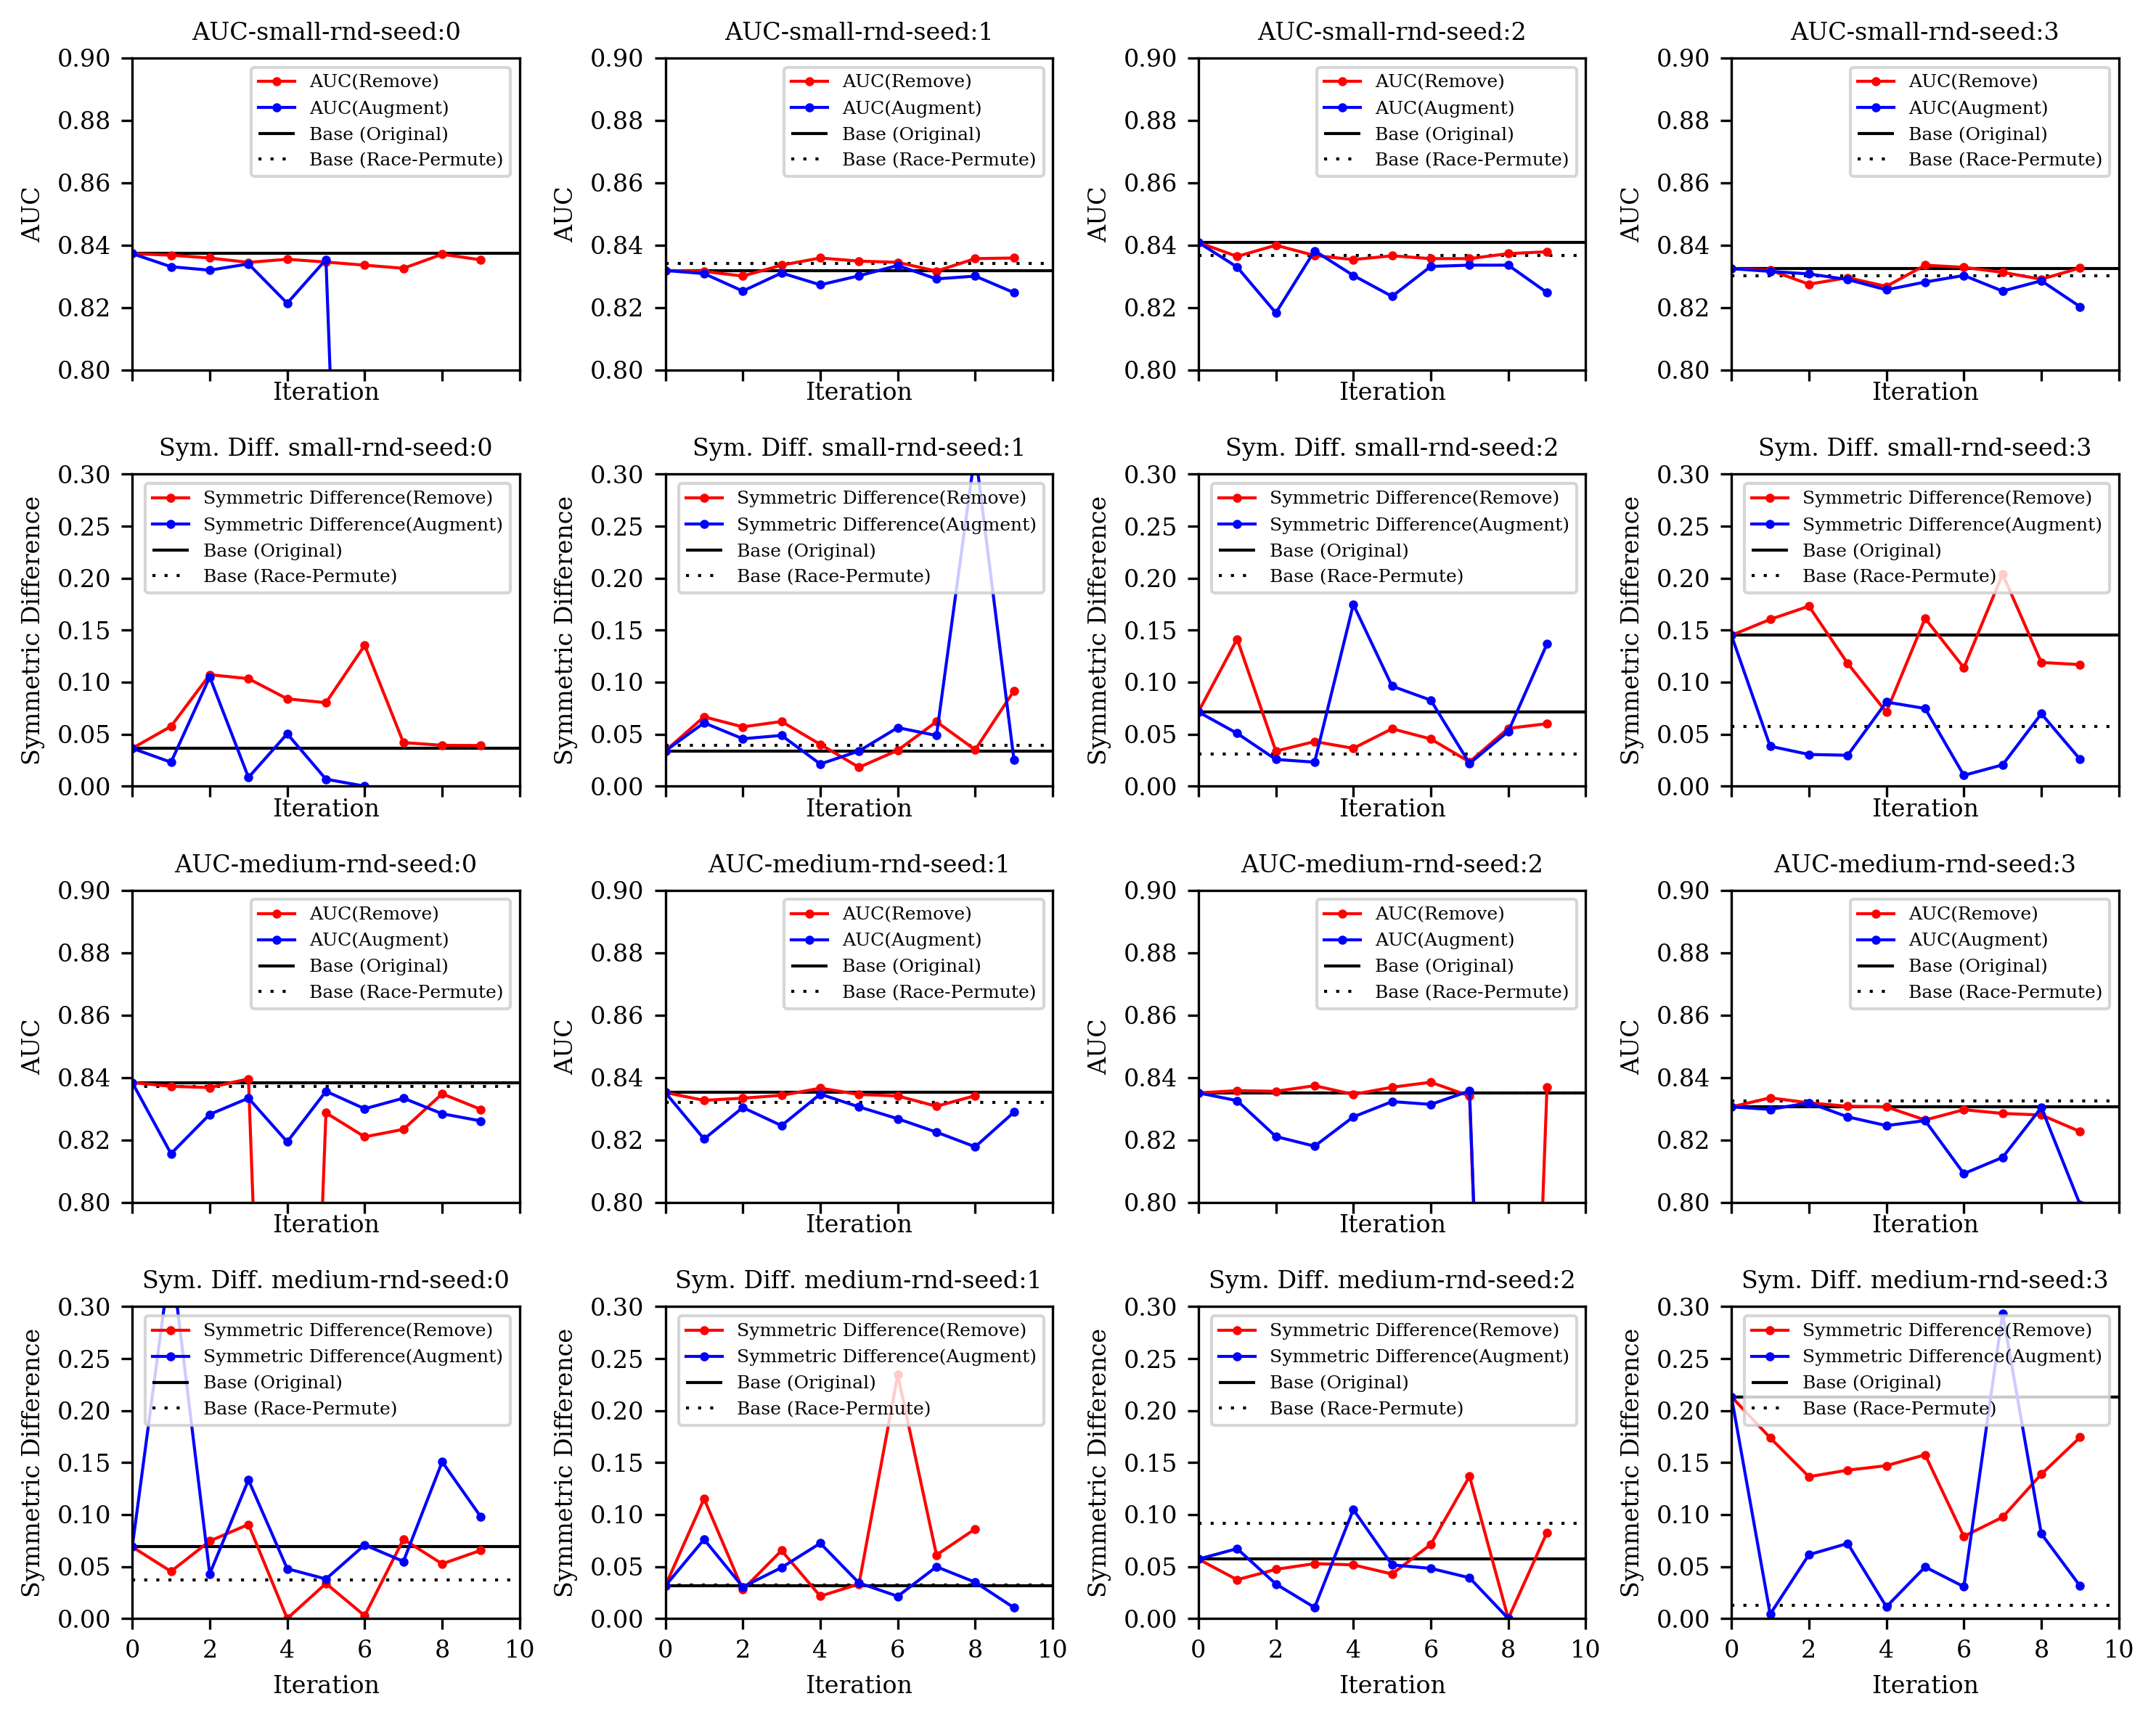

In [9]:
fig, axs = plt.subplots(4,4, figsize=(10,8), dpi=300, sharex=True, sharey=False)

for _ in range (2):
    i = _*2
    model_size = 'small' if _ == 0 else  'medium'
    for j in range(4):
        original_base =  df_res[ (df_res['model_size']  ==  model_size) & (df_res['random_seed']  ==  j)  & (df_res['strategy']  ==  'original') ]
        race_permute =  df_res[ (df_res['model_size']  ==  model_size) & (df_res['random_seed']  ==  j)  & (df_res['strategy']  ==  'race-permute') ]
        rmv_dif = df_res[ (df_res['model_size']  ==  model_size) & (df_res['random_seed']  ==  j)  & (df_res['strategy']  ==  'Rmv-SymDiff') ]
        aug_dif = df_res[ (df_res['model_size']  ==  model_size) & (df_res['random_seed']  ==  j)  & (df_res['strategy']  ==  'Aug-SymDiff') ]
        # print(original_base['Symmetric Difference'])
        # print(race_permute['Symmetric Difference'])
        # print(rmv_dif['Symmetric Difference'])
        # print(aug_dif['Symmetric Difference'])
        ax_auc = axs[i][j]
        ax_auc.set_xlabel('Iteration')
        ax_auc.set_ylabel('AUC')
        ax_auc.set_xlim(0,10)
        ax_auc.set_ylim(0.8,0.9)

        ax_sd = axs[i+1][j]
        ax_sd.set_xlabel('Iteration')
        ax_sd.set_ylabel('Symmetric Difference')
        ax_sd.set_xlim(0,10)
        ax_sd.set_ylim(0.0,0.30)
        

        # plot 
        # print (rmv_dif['iteration'].to_list(), rmv_dif['Symmetric Difference'].to_list())
        # ax_sd.vlines(x=3, ymin=0, ymax=2)
        # ax_sd.plot(x = rmv_dif['iteration'].to_list(), y = rmv_dif['Symmetric Difference'].to_list(), label = 'Symmetric Difference')
        # ax_auc.plot(x = rmv_dif['iteration'].to_list(), y = rmv_dif['AUC'].to_list(), label = 'AUC')
        ax_sd.plot(rmv_dif['Symmetric Difference'].to_list(), c= 'red', marker = 'o',  label = 'Symmetric Difference(Remove)')
        ax_sd.plot(aug_dif['Symmetric Difference'].to_list(), c= 'blue', marker = 'o',  label = 'Symmetric Difference(Augment)')
        ax_sd.hlines(y = original_base['Symmetric Difference'], xmin=0, xmax = 10, colors= 'black', linestyle='solid', label = 'Base (Original)')
        ax_sd.hlines(y = race_permute['Symmetric Difference'], xmin=0, xmax = 10, colors= 'black', linestyle='dotted', label = 'Base (Race-Permute)')
        ax_sd.legend(prop={'size': 6})
        ax_sd.set_title(f'Sym. Diff. {model_size}-rnd-seed:{j}')
        
        ax_auc.plot(rmv_dif['AUC'].to_list(), c= 'red', marker = 'o', label = 'AUC(Remove)')
        ax_auc.plot(aug_dif['AUC'].to_list(), c= 'blue', marker = 'o', label = 'AUC(Augment)')
        ax_auc.hlines(y = original_base['AUC'], xmin=0, xmax = 10, colors= 'black', linestyle='solid',  label = 'Base (Original)')
        ax_auc.hlines(y = race_permute['AUC'], xmin=0, xmax = 10, colors= 'black', linestyle='dotted', label = 'Base (Race-Permute)')
        ax_auc.legend(prop={'size': 6})
        ax_auc.set_title(f'AUC-{model_size}-rnd-seed:{j}')

    #     break
    # break
fig.tight_layout()
fig.savefig('../results/fig-adults-fairness-vs-auc.pdf', format = 'pdf', bbox_inches = 'tight')


In [9]:
## Scatter Plot

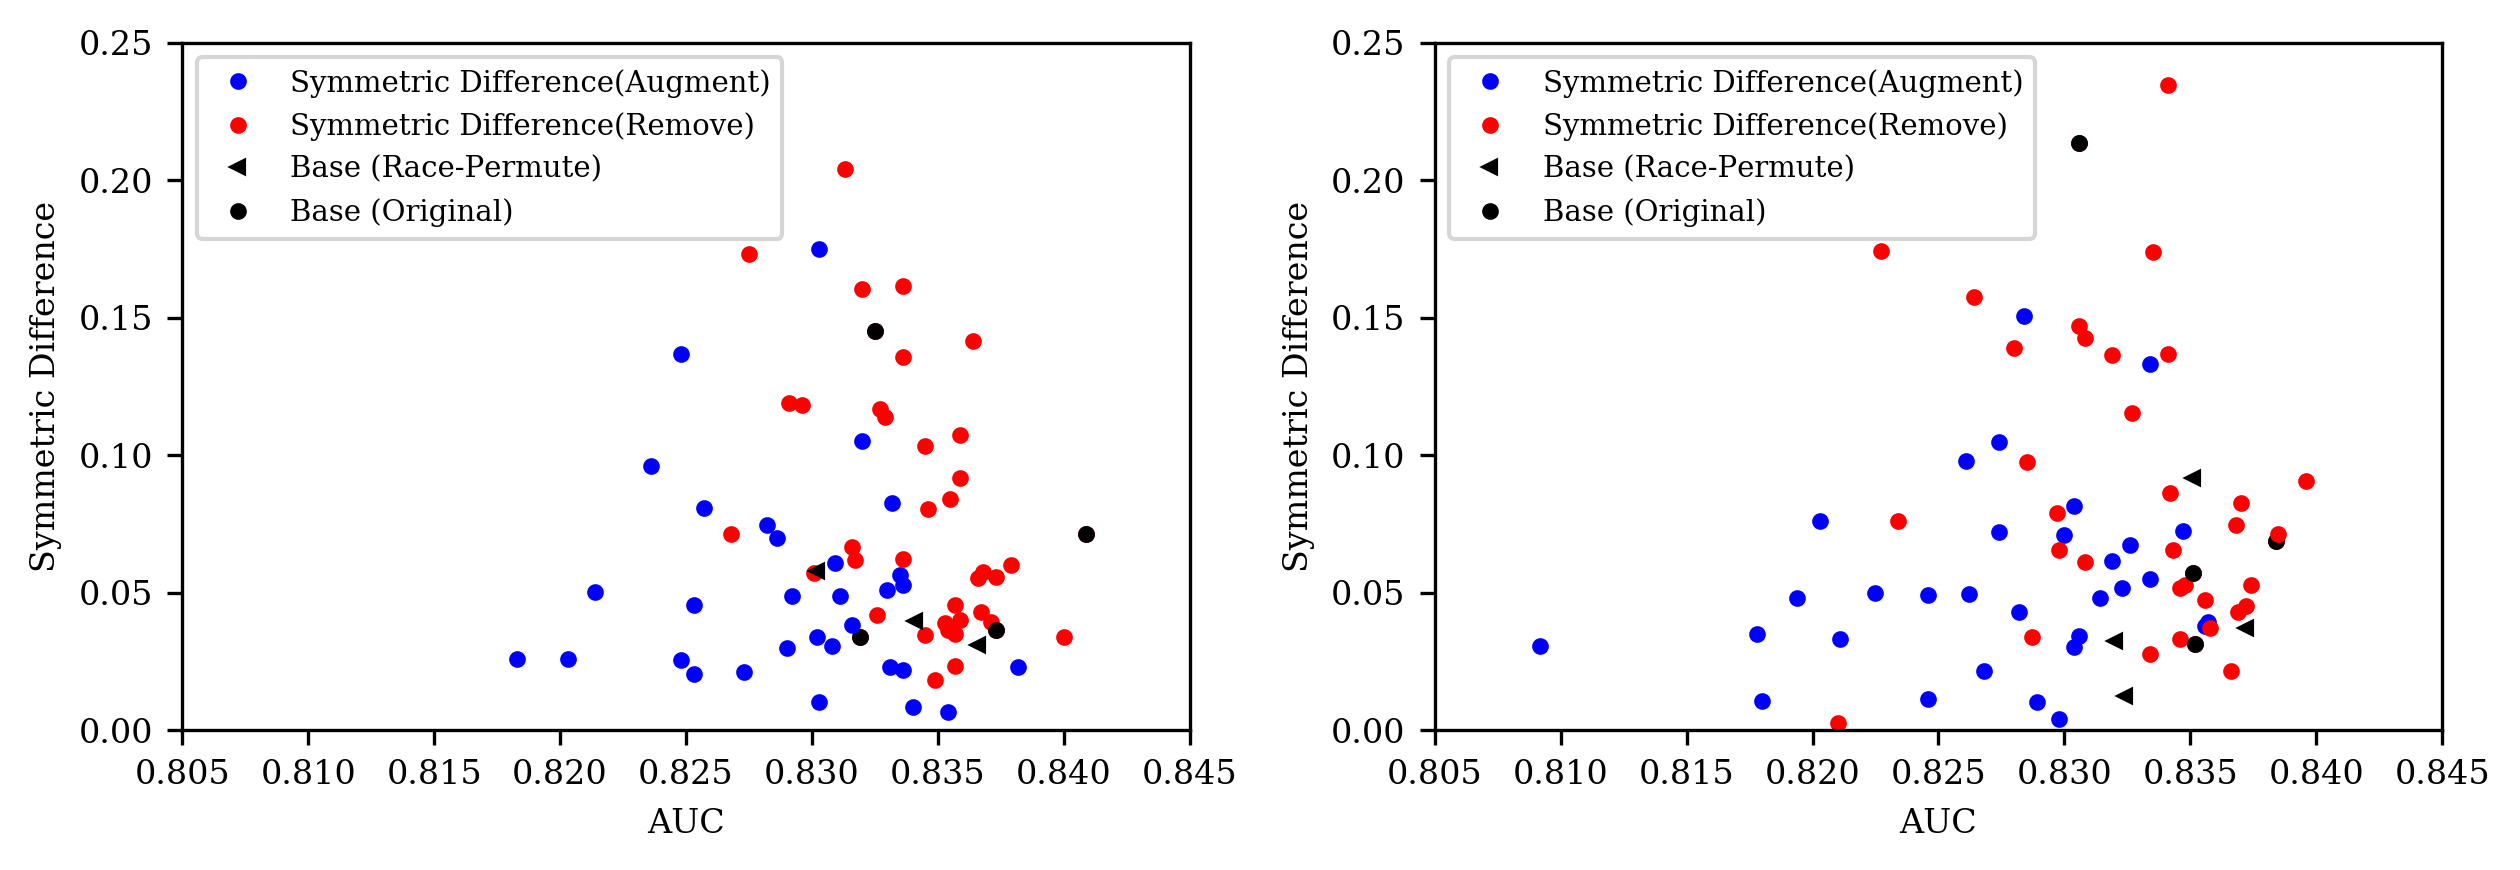

In [55]:
# scatter plots
fig, axs = plt.subplots(1,2, figsize=(8.5,3), dpi=300, sharex=False, sharey=False)


matplot_dict = {
    "original":
        {
            'colors': 'black', 
            'marker' : 'o',
            'linestyle':'solid', 
            'label' : 'Base (Original)'
        },
    
    "race-permute":
        { 
            'colors': 'black', 
            'marker' : '<',
            'linestyle':'solid', 
            'label' : 'Base (Race-Permute)'
        },
    "Rmv-SymDiff":
        { 
            'colors': 'red', 
            'marker' : 'o',
            'linestyle':'solid', 
            'label' : 'Symmetric Difference(Remove)'
        },
    "Aug-SymDiff":
        { 
            'colors': 'blue', 
            'marker' : 'o',
            'linestyle':'solid', 
            'label' : 'Symmetric Difference(Augment)'
        }
}


linewidth = 0
markersize = 3

for _ in range (2):
    i = _*2
    model_size = 'small' if _ == 0 else  'medium'
    
    scatter_points = []# (fairness, auc, strategy label)
    ax = axs[_]
    
    for j in range(4):
        original_base =  df_res[ (df_res['model_size']  ==  model_size) & (df_res['random_seed']  ==  j)  & (df_res['strategy']  ==  'original') ]
        race_permute =  df_res[ (df_res['model_size']  ==  model_size) & (df_res['random_seed']  ==  j)  & (df_res['strategy']  ==  'race-permute') ]
        rmv_dif = df_res[ (df_res['model_size']  ==  model_size) & (df_res['random_seed']  ==  j)  & (df_res['strategy']  ==  'Rmv-SymDiff') ]
        aug_dif = df_res[ (df_res['model_size']  ==  model_size) & (df_res['random_seed']  ==  j)  & (df_res['strategy']  ==  'Aug-SymDiff') ]

        # ax_auc = axs[i][j]
        # ax_auc.set_xlabel('Iteration')
        # ax_auc.set_ylabel('AUC')
        # ax_auc.set_xlim(0,10)
        # ax_auc.set_ylim(0.8,0.9)

        # ax_sd = axs[i+1][j]
        # ax_sd.set_xlabel('Iteration')
        # ax_sd.set_ylabel('Symmetric Difference')
        # ax_sd.set_xlim(0,10)
        # ax_sd.set_ylim(0.0,0.30)
        
        df_data_remove=rmv_dif[['AUC','Symmetric Difference']]
        df_data_augment=aug_dif[['AUC','Symmetric Difference']]
        df_original = original_base[['AUC','Symmetric Difference']]
        df_race_permute = race_permute[['AUC','Symmetric Difference']]
        
        ax.set_xlim(0.805,0.845)
        ax.set_ylim(0,0.25)
        
        ax.set_xlabel("AUC")
        ax.set_ylabel("Symmetric Difference")

        plot_dict = matplot_dict['Aug-SymDiff']
        points = df_data_augment.to_numpy()
        ax.plot(points[:,0], points[:,1],  color=plot_dict['colors'], marker=plot_dict['marker'], linestyle=plot_dict['linestyle'], linewidth=linewidth, markersize=markersize, label = plot_dict['label'])
        
        plot_dict = matplot_dict['Rmv-SymDiff']
        points = df_data_remove.to_numpy()
        ax.plot(points[:,0], points[:,1],  color=plot_dict['colors'], marker=plot_dict['marker'], linestyle=plot_dict['linestyle'], linewidth=linewidth, markersize=markersize, label = plot_dict['label'])

        plot_dict = matplot_dict['race-permute']
        points = df_race_permute.to_numpy()
        ax.plot(points[:,0], points[:,1],  color=plot_dict['colors'], marker=plot_dict['marker'], linestyle=plot_dict['linestyle'], linewidth=linewidth, markersize=markersize, label = plot_dict['label'])
        
        plot_dict = matplot_dict['original']
        points = df_original.to_numpy()
        ax.plot(points[:,0], points[:,1],  color=plot_dict['colors'], marker=plot_dict['marker'], linestyle=plot_dict['linestyle'], linewidth=linewidth, markersize=markersize, label = plot_dict['label'])
        
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())
        

        # ax.legend()

        
        # ax_sd.plot(rmv_dif[['AUC','Symmetric Difference']].to_list(), c= 'red', marker = 'o',  label = 'Symmetric Difference(Remove)')
        # ax_sd.plot(aug_dif['Symmetric Difference'].to_list(), c= 'blue', marker = 'o',  label = 'Symmetric Difference(Augment)')
        # ax_sd.hlines(y = original_base['Symmetric Difference'], xmin=0, xmax = 10, colors= 'black', linestyle='solid', label = 'Base (Original)')
        # ax_sd.hlines(y = race_permute['Symmetric Difference'], xmin=0, xmax = 10, colors= 'black', linestyle='dotted', label = 'Base (Race-Permute)')
        
        # ax_sd.legend(prop={'size': 6})
        # ax_sd.set_title(f'Sym. Diff. {model_size}-rnd-seed:{j}')
        
        # ax_auc.plot(rmv_dif['AUC'].to_list(), c= 'red', marker = 'o', label = 'AUC(Remove)')
        # ax_auc.plot(aug_dif['AUC'].to_list(), c= 'blue', marker = 'o', label = 'AUC(Augment)')
        # ax_auc.hlines(y = original_base['AUC'], xmin=0, xmax = 10, colors= 'black', linestyle='solid',  label = 'Base (Original)')
        # ax_auc.hlines(y = race_permute['AUC'], xmin=0, xmax = 10, colors= 'black', linestyle='dotted', label = 'Base (Race-Permute)')
        
        # ax_auc.legend(prop={'size': 6})
        # ax_auc.set_title(f'AUC-{model_size}-rnd-seed:{j}')

    #     break
    # break
fig.tight_layout()
fig.savefig('../results/fig-adults-fairness-vs-auc-scatter.pdf', format = 'pdf', bbox_inches = 'tight')


# For COMPAS (not done yet)

In [4]:
res = '../results/results-compas.json'

with open(res, 'r') as f:
    res_dict = json.load(f)
print (len(res_dict.keys()))
res_records = []
for key in res_dict.keys():
    key_dict = json.loads(key)
    val_dict = res_dict[key]
    final_dict = {**key_dict, **val_dict}
    res_records.append(final_dict)
df_res = pd.DataFrame.from_records(res_records).round(4)

205


In [26]:
# df_strategy = 'race-permute'
# model_size = 'Small'
# # df_res[(df_res['strategy'] == df_strategy) & (df_res['model_size'] == model_size)] 
# df_res[(df_res['strategy'] == df_strategy) ] 

In [29]:
raw_strategy = ['original', 'race-permute', 'Rmv-SymDiff','Aug-SymDiff']
strategy_label = ['Original', 'Race-Permuted', 'Data-Removed(Best Fairness)','Data-Augmented(Best Fairness)']
records_list = []


def return_printable_df(random_seed, model_size):
    auc_dict = {}
    sd_dict ={}
    df_data =  df_res[df_res['random_seed']==random_seed] 
    for df_strategy, strategy_lb  in zip(raw_strategy, strategy_label):
        _df = df_data[(df_data['strategy'] == df_strategy) & (df_data['model_size'] == model_size)] 
        sd_list = _df['Symmetric Difference'].tolist()
        auc_list = _df['AUC'].tolist()
        # print (df_strategy)
        # print (_df)
        if strategy_lb == 'Original':
            sd = sd_list[0]
            auc = auc_list[0]
        if strategy_lb == 'Race-Permuted':
            sd = sd_list[0]
            auc = auc_list[0]
        if strategy_lb == 'Data-Removed(Best Fairness)':
            # the best fairness score
            best_fairness_iter= np.argmin(sd_list)
            sd = (sd_list[best_fairness_iter], best_fairness_iter)
            auc = (auc_list[best_fairness_iter], best_fairness_iter)
            # best_auc_iter= np.argmax(auc_list)
            # sd.append((sd_list[best_auc_iter], best_auc_iter))
            # auc.append((auc_list[best_auc_iter], best_auc_iter))

        if strategy_lb == 'Data-Augmented(Best Fairness)':
            best_fairness_iter= np.argmin(sd_list)
            sd = (sd_list[best_fairness_iter], best_fairness_iter)
            auc = (auc_list[best_fairness_iter], best_fairness_iter)
            # best_auc_iter= np.argmax(auc_list)
            # sd.append((sd_list[best_auc_iter], best_auc_iter))
            # auc.append((auc_list[best_auc_iter], best_auc_iter))
        
        auc_dict[strategy_lb] = auc
        sd_dict[strategy_lb] = sd
        # print (strategy_lb, _df.shape, sd, auc)



    sd_dict.update({'model_size':model_size, 'random_seed':random_seed, 'measure':'Sym. Diff.'})
    auc_dict.update({'model_size':model_size, 'random_seed':random_seed, 'measure':'AUC'})

    # for strategy_lb in auc_dict.keys():
    #     records_list.append({'model_size':model_size, 'random_seed':random_seed, 'measure':'Sym. Diff.', strategy_lb: sd_dict[strategy_lb]})
    #     records_list.append({'model_size':model_size, 'random_seed':random_seed, 'measure':'AUC', strategy_lb: auc_dict[strategy_lb]})
    print_df = pd.DataFrame.from_records([auc_dict, sd_dict])[['model_size', 'random_seed', 'measure', 'Original', 'Race-Permuted',  'Data-Removed(Best Fairness)', 'Data-Augmented(Best Fairness)']]
    return print_df


In [30]:

random_seed = 1
model_size = 'small'

df_list = []
for model_size in ['small', 'medium']:
    for random_seed in [0,1,2,3,4]:
        df_list.append(return_printable_df(random_seed, model_size))

all_pd = pd.concat(df_list).reset_index(drop = True)
all_pd = all_pd.set_index(['model_size','random_seed','measure'])

# print_df.set_index(['model_size', 'random_seed'])

In [31]:
all_pd

Original  Race-Permuted  \
model_size random_seed measure                               
small      0           AUC           0.8373            NaN   
                       Sym. Diff.    0.0364            NaN   
           1           AUC           0.8319         0.8341   
                       Sym. Diff.    0.0339         0.0396   
           2           AUC           0.8409         0.8366   
                       Sym. Diff.    0.0714         0.0309   
           3           AUC           0.8325         0.8302   
                       Sym. Diff.    0.1451         0.0577   
           4           AUC           0.8370         0.8345   
                       Sym. Diff.    0.0956         0.0407   
medium     0           AUC           0.8384         0.8372   
                       Sym. Diff.    0.0689         0.0372   
           1           AUC           0.8352         0.8320   
                       Sym. Diff.    0.0314         0.0323   
           2           AUC           0.8351         0.8351   
                       Sym. Diff.    0.0571         0.0918   
           3           AUC           0.8306         0.8324   
                       Sym. Diff.    0.2133         0.0124   
           4           AUC           0.5000         0.5000   
                       Sym. Diff.   -0.0000         0.0000   

                                  Data-Removed(Best Fairness)  \
model_size random_seed measure                                  
small      0           AUC                        (0.8373, 0)   
                       Sym. Diff.                 (0.0364, 0)   
           1           AUC                        (0.8349, 5)   
                       Sym. Diff.                 (0.0181, 5)   
           2           AUC                        (0.8357, 7)   
                       Sym. Diff.                 (0.0233, 7)   
           3           AUC                        (0.8268, 4)   
                       Sym. Diff.                 (0.0712, 4)   
           4           AUC                        (0.8352, 2)   
                       Sym. Diff.                 (0.0495, 2)   
medium     0           AUC                           (0.5, 4)   
                       Sym. Diff.                   (-0.0, 4)   
           1           AUC                        (0.8366, 4)   
                       Sym. Diff.                 (0.0215, 4)   
           2           AUC                           (0.5, 8)   
                       Sym. Diff.                   (-0.0, 8)   
           3           AUC                        (0.8297, 6)   
                       Sym. Diff.                  (0.079, 6)   
           4           AUC                           (0.5, 0)   
                       Sym. Diff.                    (0.0, 0)   

                                  Data-Augmented(Best Fairness)  
model_size random_seed measure                                   
small      0           AUC                             (0.5, 6)  
                       Sym. Diff.                     (-0.0, 6)  
           1           AUC                          (0.8273, 4)  
                       Sym. Diff.                   (0.0213, 4)  
           2           AUC                          (0.8336, 7)  
                       Sym. Diff.                   (0.0218, 7)  
           3           AUC                          (0.8303, 6)  
                       Sym. Diff.                   (0.0104, 6)  
           4           AUC                          (0.8287, 8)  
                       Sym. Diff.                      (0.0, 8)  
medium     0           AUC                          (0.8356, 5)  
                       Sym. Diff.                    (0.038, 5)  
           1           AUC                          (0.8289, 9)  
                       Sym. Diff.                   (0.0104, 9)  
           2           AUC                             (0.5, 8)  
                       Sym. Diff.                      (0.0, 8)  
           3           AUC                         

In [32]:
print (all_pd.to_latex())

\begin{tabular}{lllrrll}
\toprule
       &   &            &  Original &  Race-Permuted & Data-Removed(Best Fairness) & Data-Augmented(Best Fairness) \\
model\_size & random\_seed & measure &           &                &                             &                               \\
\midrule
small & 0 & AUC &    0.8373 &            NaN &                 (0.8373, 0) &                      (0.5, 6) \\
       &   & Sym. Diff. &    0.0364 &            NaN &                 (0.0364, 0) &                     (-0.0, 6) \\
       & 1 & AUC &    0.8319 &         0.8341 &                 (0.8349, 5) &                   (0.8273, 4) \\
       &   & Sym. Diff. &    0.0339 &         0.0396 &                 (0.0181, 5) &                   (0.0213, 4) \\
       & 2 & AUC &    0.8409 &         0.8366 &                 (0.8357, 7) &                   (0.8336, 7) \\
       &   & Sym. Diff. &    0.0714 &         0.0309 &                 (0.0233, 7) &                   (0.0218, 7) \\
       & 3 & AUC &    